# Pipeline for the anomaly detection on the SKAB using Convolutional Autoencoder

test1

mark down은 esc + m으로 변경할 수 있습니다

#### test4

### test3

## test2

# test1

<blockquote>Qing, 2022, AAAI, Test Deep Learning</blockquote>

<code>
x=5
y=7
print(x+y)
</code>

x=5
y=7
print(x+y)


$\sqrt{k}$

<b>강조텍스트</b>

<i>이텔릭텍스트</b>

<ol>
<li> 네이버 </li>
<li> 다음 </li>
<li> 구글 </li>
</ol>

<u2pl>
<li> 네이버 </li>
<li> 다음 </li>
<li> 구글 </li>
</ul>

<a href="https://www.naver.com" >네이버로 들어가기</a>

In [3]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# additional modules
import sys
sys.path.append('../utils')
# 이 코드 부분이 evaluating 코드를 불러와서 그 안에 있는 함수중 evaluating_chane_point가져오는 부분
from evaluating import evaluating_change_point

## Data loading

In [4]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk("../data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [5]:
# datasets with anomalies loading
list_of_df = [pd.read_csv(file, 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file]
# anomaly-free df loading
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0], 
                            sep=';', 
                            index_col='datetime', 
                            parse_dates=True)

## Data description and visualization

In [6]:
# dataset characteristics printing
print(f'A number of datasets in the SkAB v1.0: {len(list_of_df)}\n')
print(f'Shape of the random dataset: {list_of_df[0].shape}\n')
n_cp = sum([len(df[df.changepoint==1.]) for df in list_of_df])
n_outlier = sum([len(df[df.anomaly==1.]) for df in list_of_df])
print(f'A number of changepoints in the SkAB v1.0: {n_cp}\n')
print(f'A number of outliers in the SkAB v1.0: {n_outlier}\n')
print(f'Head of the random dataset:')
display(list_of_df[0].head())

A number of datasets in the SkAB v1.0: 34

Shape of the random dataset: (745, 10)

A number of changepoints in the SkAB v1.0: 129

A number of outliers in the SkAB v1.0: 13067

Head of the random dataset:


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-01 15:44:06,0.082065,0.133521,1.27794,0.054711,92.2562,22.2577,209.639,76.0197,0.0,0.0
2020-03-01 15:44:07,0.082724,0.132378,1.12118,-0.273216,92.0144,22.2577,221.250,76.9806,0.0,0.0
2020-03-01 15:44:08,0.081648,0.139038,1.93242,0.054711,92.2413,22.2748,236.615,76.0197,0.0,0.0
2020-03-01 15:44:09,0.083335,0.132742,1.25962,-0.273216,92.2438,22.2657,230.375,77.0000,0.0,0.0
2020-03-01 15:44:10,0.082272,0.133171,1.59773,0.054711,92.3611,22.2591,249.701,77.0000,0.0,0.0


In [7]:
display(list_of_df[0].head(30))

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-01 15:44:06,0.082065,0.133521,1.277940,0.054711,92.2562,22.2577,209.639,76.0197,0.0,0.0
2020-03-01 15:44:07,0.082724,0.132378,1.121180,-0.273216,92.0144,22.2577,221.250,76.9806,0.0,0.0
2020-03-01 15:44:08,0.081648,0.139038,1.932420,0.054711,92.2413,22.2748,236.615,76.0197,0.0,0.0
2020-03-01 15:44:09,0.083335,0.132742,1.259620,-0.273216,92.2438,22.2657,230.375,77.0000,0.0,0.0
2020-03-01 15:44:10,0.082272,0.133171,1.597730,0.054711,92.3611,22.2591,249.701,77.0000,0.0,0.0
2020-03-01 15:44:11,0.081960,0.133553,1.208400,0.382638,92.2081,22.2717,232.458,77.0000,0.0,0.0
2020-03-01 15:44:12,0.083055,0.131657,0.712917,0.382638,92.2305,22.2644,220.934,77.0000,0.0,0.0
2020-03-01 15:44:13,0.081509,0.138372,1.329750,0.054711,92.3508,22.2651,238.203,76.9806,0.0,0.0
2020-03-01 15:44:14,0.083543,0.132835,1.865960,0.054711,92.2582,22.2651,242.887,76.0197,0.0,0.0


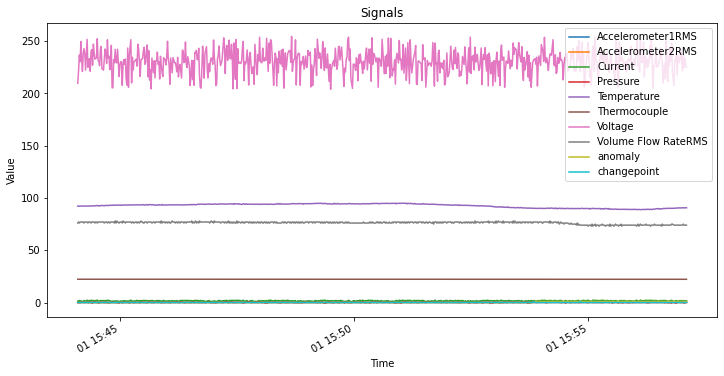

In [8]:
# random dataset visualizing
list_of_df[0].plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

## Labels

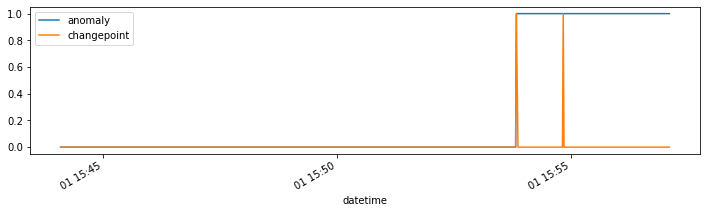

In [9]:
# plotting the labels both for outlier and changepoint detection problems
list_of_df[0].anomaly.plot(figsize=(12,3))
list_of_df[0].changepoint.plot()
plt.legend()
plt.show()

## Method applying

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.signal import medfilt
from sklearn import decomposition
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from itertools import product

C:\Users\sju12\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
# Function for repeatability
def Random(seed_value):
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    tf.random.set_seed(seed_value)

In [12]:
def arch(data):
    Random(0)
    model = keras.Sequential(
        [
            layers.Input(shape=(data.shape[1], data.shape[2])),
            layers.Conv1D(
                filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            layers.Dropout(rate=0.2),
            layers.Conv1D(
                filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            layers.Conv1DTranspose(
                filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            layers.Dropout(rate=0.2),
            layers.Conv1DTranspose(
                filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
        ]
    )
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    # model.summary()

    history = model.fit(
        data,
        data,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        verbose=0,
        callbacks=[
            keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=0)
        ],
    )
    return history, model

### Training in the beginning of each dataset

In [13]:
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=60):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

In [14]:
# hyperparameters selection
N_STEPS = 60
Q = 0.999 # quantile for upper control limit (UCL) selection

# inference
predicted_outlier, predicted_cp = [], []
for df in list_of_df:
    X_train = df[:400].drop(['anomaly', 'changepoint'], axis=1)
    
    # scaler init and fitting
    StSc = StandardScaler()
    StSc.fit(X_train)
    
    # convert into input/output
    X = create_sequences(StSc.transform(X_train), N_STEPS)
    
    # model defining and fitting
    history, model = arch(X)
    
    # results predicting
    residuals = pd.Series(np.sum(np.mean(np.abs(X - model.predict(X)), axis=1), axis=1))
    UCL = residuals.quantile(Q)
    
    # results predicting
    X = create_sequences(StSc.transform(df.drop(['anomaly','changepoint'], axis=1)), N_STEPS)
    cnn_residuals = pd.Series(np.sum(np.mean(np.abs(X - model.predict(X)), axis=1), axis=1))
    
    # data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
    anomalous_data = cnn_residuals > (3/2 * UCL)
    anomalous_data_indices = []
    for data_idx in range(N_STEPS - 1, len(X) - N_STEPS + 1):
        if np.all(anomalous_data[data_idx - N_STEPS + 1 : data_idx]):
            anomalous_data_indices.append(data_idx)
    
    prediction = pd.Series(data=0, index=df.index)
    prediction.iloc[anomalous_data_indices] = 1
    
    # predicted outliers saving
    predicted_outlier.append(prediction)
    
    # predicted CPs saving
    prediction_cp = abs(prediction.diff())
    prediction_cp[0] = prediction[0]
    predicted_cp.append(prediction_cp)

In [15]:
list_of_df[0]

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-01 15:44:06,0.082065,0.133521,1.27794,0.054711,92.2562,22.2577,209.639,76.0197,0.0,0.0
2020-03-01 15:44:07,0.082724,0.132378,1.12118,-0.273216,92.0144,22.2577,221.250,76.9806,0.0,0.0
2020-03-01 15:44:08,0.081648,0.139038,1.93242,0.054711,92.2413,22.2748,236.615,76.0197,0.0,0.0
2020-03-01 15:44:09,0.083335,0.132742,1.25962,-0.273216,92.2438,22.2657,230.375,77.0000,0.0,0.0
2020-03-01 15:44:10,0.082272,0.133171,1.59773,0.054711,92.3611,22.2591,249.701,77.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-01 15:57:02,0.080787,0.131610,1.52788,-0.273216,90.5728,22.2021,237.739,74.9799,1.0,0.0
2020-03-01 15:57:03,0.081003,0.128565,1.78583,-0.273216,90.4393,22.2120,224.866,74.0000,1.0,0.0
2020-03-01 15:57:04,0.079904,0.133247,1.51095,-0.273216,90.6200,22.2098,233.475,74.0000,1.0,0.0


### Results

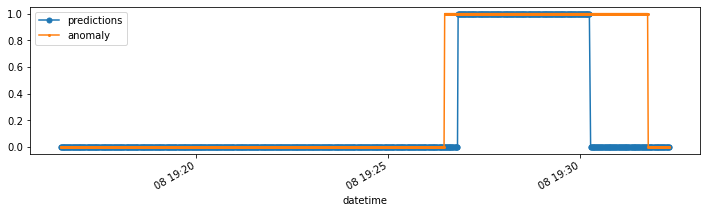

In [16]:
# true outlier indices selection
true_outlier = [df.anomaly for df in list_of_df]

predicted_outlier[5].plot(figsize=(12, 3), label='predictions', marker='o', markersize=5)
true_outlier[5].plot(marker='o', markersize=2)
plt.legend();

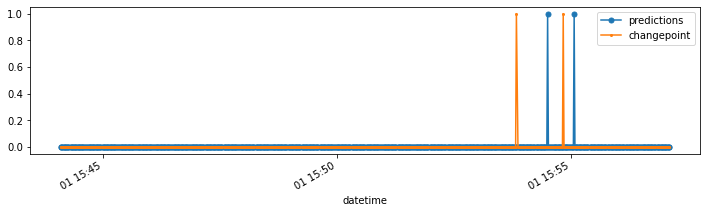

In [17]:
# true changepoint indices selection
true_cp = [df.changepoint for df in list_of_df]

predicted_cp[0].plot(figsize=(12, 3), label='predictions', marker='o', markersize=5)
true_cp[0].plot(marker='o', markersize=2)
plt.legend();

## Metrics calculation

In [18]:
# binary classification metrics calculation
binary = evaluating_change_point(true_outlier, predicted_outlier, metric='binary', numenta_time='30 sec')

False Alarm Rate 4.67 %
Missing Alarm Rate 37.07 %
F1 metric 0.73


## FAR이란?

FAR은 False Alarm Rate으로서 울리지 말아야 하는 알람이 울려벼린 비율을 얘기한 것이다

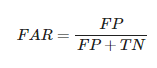

## MAR이란?

MAR은 Missing Alarm Rate으로서 울려야 하는데 울리지 않은 비율을 얘기한 것

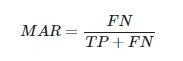

In [19]:
# average detection delay metric calculation
add = evaluating_change_point(true_cp, predicted_cp, metric='average_delay', numenta_time='30 sec')

Average delay 0 days 00:00:13.080000
A number of missed CPs = 104


In [20]:
# nab metric calculation
nab = evaluating_change_point(true_cp, predicted_cp, metric='nab', numenta_time='30 sec')

Intersection of the windows of too wide widths for dataset 2
Intersection of the windows of too wide widths for dataset 2
Intersection of the windows of too wide widths for dataset 2
Intersection of the windows of too wide widths for dataset 3
Intersection of the windows of too wide widths for dataset 3
Intersection of the windows of too wide widths for dataset 3
Intersection of the windows of too wide widths for dataset 5
Intersection of the windows of too wide widths for dataset 5
Intersection of the windows of too wide widths for dataset 5
Intersection of the windows of too wide widths for dataset 5
Intersection of the windows of too wide widths for dataset 5
Intersection of the windows of too wide widths for dataset 5
Intersection of the windows of too wide widths for dataset 12
Intersection of the windows of too wide widths for dataset 12
Intersection of the windows of too wide widths for dataset 12
Intersection of the windows of too wide widths for dataset 12
Intersection of the 

## [Additional] localization